# Hands-on 4: Descriptive Statistics 

As always, import modules first:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#The following two lines allow you to view all columns or all rows of a table, if that may be desired.
#They are commented out here as qm7b is a relatively large dataset
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv')

In [7]:
qm7b

,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7206,7207,-1109.600952,10.914760,0.117003,-10.697,-0.494,4.362956,10.42614,0.89007,-8.4251,...,-10.7005,0.9389,10.069128,11.29757,4,3,0,3,1,0
7207,7208,-1343.513794,10.797284,0.721207,-8.721,-0.004,3.271309,7.81747,0.76079,-6.0811,...,-7.8786,0.9163,12.755189,13.29895,6,4,2,0,1,0
7208,7209,-1330.148804,10.801065,0.877879,-8.788,-0.117,3.117566,7.85228,0.89004,-6.1207,...,-7.9069,0.7085,12.767596,13.18706,6,4,2,0,1,0
7209,7210,-1355.485596,10.697140,0.609902,-8.657,-0.191,3.249053,7.71657,0.93841,-6.1532,...,-7.8981,0.6403,13.711397,13.44517,6,4,2,0,1,0


In [8]:
qm7b.keys()

Index(['id', 'ae_pbe0', 'emax_zindo', 'imax_zindo', 'homo_zindo', 'lumo_zindo',
       'e1_zindo', 'ip_zindo', 'ea_zindo', 'homo_pbe0', 'lumo_pbe0', 'homo_gw',
       'lumo_gw', 'p_pbe0', 'p_scs', 'n_H', 'n_C', 'n_N', 'n_O', 'n_S',
       'n_Cl'],
      dtype='object')

| Column Name | Unit  |  Description |
|----------|----------|-----------|
|ae_pbe0   |kcal/mol  |Atomization energy (DFT/PBE0)
|p_pbe0    |Angstrom^3|Polarizability (DFT/PBE0)
|p_scs     |Angstrom^3|Polarizability (self-consistent screening)
|homo_gw   |eV        |Highest occupied molecular orbital (GW)
|homo_pbe0 |eV        |Highest occupied molecular orbital (DFT/PBE0)
|homo_zindo|eV        |Highest occupied molecular orbital (ZINDO/s)
|lumo_gw   |eV        |Lowest unoccupied molecular orbital (GW)
|lumo_pbe0 |eV        |Lowest unoccupied molecular orbital (DFT/PBE0)
|lumo_zindo|eV        |Lowest unoccupied molecular orbital (ZINDO/s)
|ip_zindo  |eV        |Ionization potential (ZINDO/s)
|ea_zindo  |eV        |Electron affinity (ZINDO/s)
|e1_zindo  |eV        |First excitation energy (ZINDO)
|emax_zindo|eV        |Maximal absorption intensity (ZINDO)
|imax_zindo|arbitrary |Excitation energy at maximal absorption (ZINDO)
|n_H       |          |number of Hydrogen atoms
|n_C       |          |number of Carbon atoms
|n_N       |          |number of Nitrogen atoms
|n_O       |          |number of Oxygen atoms
|n_S       |          |number of Sulfur atoms
|n_Cl      |          |number of Chlorine atoms

In [9]:
qm7b.shape

(7211, 21)

# HOMO and LUMO

In [10]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Molecule_HOMO-LUMO_diagram.svg/1200px-Molecule_HOMO-LUMO_diagram.svg.png',width = 400, height = 500)

HOMO, or the *Highest Occupied Molecular Orbital*, describes the highest energy level occupied by electrons in the ground state of a molecule. The LUMO, or the *Lowest Unoccupied Molecular Orbital*, then describes the lowest unoccupied energy level which excited electrons from the HOMO often enter.

### Observing how HOMO & LUMO measurements by various techniques compare

Since there are three separate values for HOMO in this dataset, calculated with different simulation methods, let's look at how tightly correlated these values are with some initial plots. 

Though this is not necessary, we first extract the HOMO values to have them clearly visible in one place:

In [11]:
HOMOs = qm7b[['homo_pbe0','homo_gw','homo_zindo']]
HOMOs

,homo_pbe0,homo_gw,homo_zindo
0,-10.9488,-14.1341,-16.013
1,-9.5577,-12.5472,-13.549
2,-7.8768,-10.4383,-10.160
3,-8.4021,-11.1629,-10.706
4,-8.3534,-10.8132,-12.365
...,...,...,...
7206,-8.4251,-10.7005,-10.697
7207,-6.0811,-7.8786,-8.721
7208,-6.1207,-7.9069,-8.788
7209,-6.1532,-7.8981,-8.657


Let's explore the data a litte, make some sense of this incomprehensible jumble of numbers, and observe how the three HOMO measurements look relative to each other. This allows us to appreciate and get an initial feel for the data. The three values are calculated with different simulation techniques, ZINDO, GW, and DFT/PBE0.

And now we observe how `homo_pbe0` and `homo_gw` are correlated, where the colors of the datapoints are varied with `homo-zindo`

Text(0, 0.5, 'homo_gw (eV)')

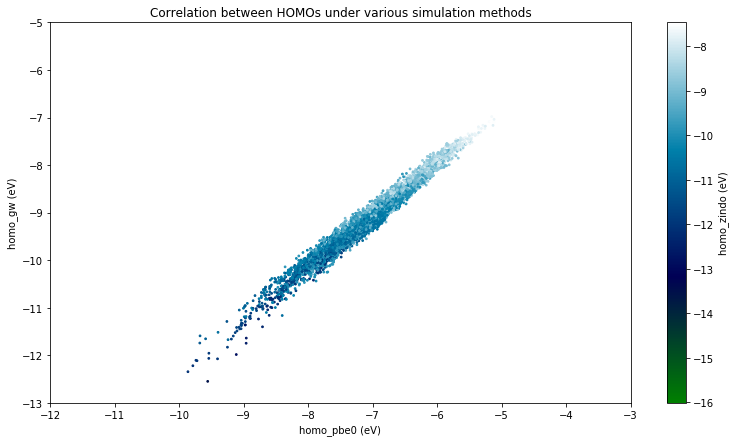

In [12]:
fig = plt.figure(figsize=(13,7))
plt.scatter(HOMOs['homo_pbe0'], HOMOs['homo_gw'], s=3, c=HOMOs['homo_zindo'], cmap='ocean')
plt.colorbar(label='homo_zindo (eV)')
plt.xlim(-12,-3)
plt.ylim(-13,-5)
plt.title('Correlation between HOMOs under various simulation methods')
plt.xlabel('homo_pbe0 (eV)')
plt.ylabel('homo_gw (eV)')

And now we observe how `homo_pbe0` and `homo_zindo` are correlated, where the colors of the datapoints are varied with `homo-gw`

Text(0, 0.5, 'homo_zindo (eV)')

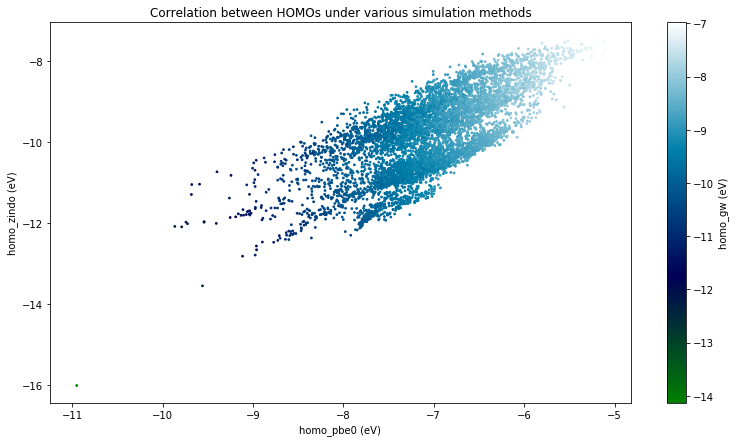

In [13]:
fig = plt.figure(figsize=(13,7))
plt.scatter(HOMOs['homo_pbe0'], HOMOs['homo_zindo'], s=3, c=HOMOs['homo_gw'],cmap='ocean')
plt.colorbar(label='homo_gw (eV)')
#plt.xlim(-14,-5)
#plt.ylim(-14,-5)
plt.title('Correlation between HOMOs under various simulation methods')
plt.xlabel('homo_pbe0 (eV)')
plt.ylabel('homo_zindo (eV)')

Finally, let's observe how `homo_gw` and `homo_zindo` are correlated, where the colors of the datapoints are varied with `homo-pbe0`

Text(0, 0.5, 'homo_zindo (eV)')

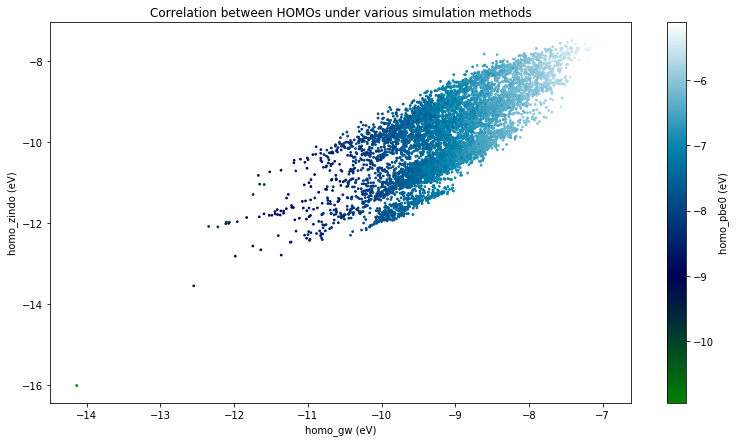

In [14]:
fig = plt.figure(figsize=(13,7))
plt.scatter(HOMOs['homo_gw'], HOMOs['homo_zindo'], s=3, c=HOMOs['homo_pbe0'], cmap='ocean')
plt.colorbar(label='homo_pbe0 (eV)')
#plt.xlim(-14,-5)
#plt.ylim(-14,-5)
plt.title('Correlation between HOMOs under various simulation methods')
plt.xlabel('homo_gw (eV)')
plt.ylabel('homo_zindo (eV)')

Just for fun, let's look at how the three values look together on a 3D plot!

Text(0.5, 0.92, 'Correlation between HOMOs under various simulation methods')

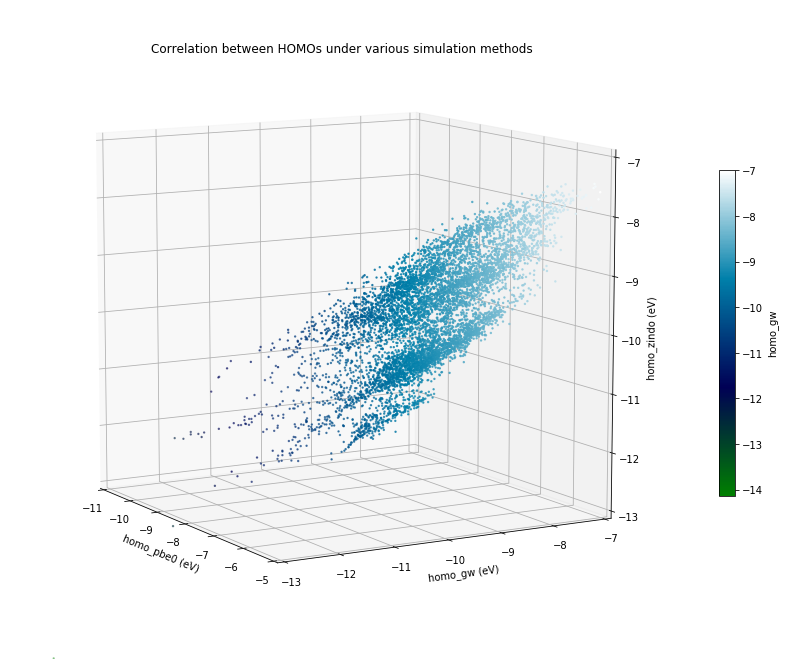

In [15]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d', zlim = [-13,-7], xlim = [-11,-5], ylim = [-13,-7])
HOMO3d=ax.scatter3D(HOMOs['homo_pbe0'], HOMOs['homo_gw'], HOMOs['homo_zindo'], s=2, c=HOMOs['homo_gw'], cmap='ocean')
cbar=plt.colorbar(HOMO3d, shrink=0.5)
cbar.set_label('homo_gw')
#Feel free to play around with the values in ax.view_init(), 
#which allows you to change the viewing angle of your final plot
ax.view_init(10,-30)
ax.set_xlabel('homo_pbe0 (eV)')
ax.set_ylabel('homo_gw (eV)')
ax.set_zlabel('homo_zindo (eV)')
ax.set_title('Correlation between HOMOs under various simulation methods')

### Now, on to LUMOs

We repeat the same process here:

In [16]:
LUMOs = qm7b[['lumo_pbe0','lumo_gw','lumo_zindo']]
LUMOs

,lumo_pbe0,lumo_gw,lumo_zindo
0,0.1323,1.0870,4.162
1,0.1452,1.1186,3.684
2,-0.0620,1.9456,1.231
3,0.4143,1.1958,2.145
4,0.2690,1.2002,3.825
...,...,...,...
7206,-0.5539,0.9389,-0.494
7207,-0.4509,0.9163,-0.004
7208,-0.8678,0.7085,-0.117
7209,-0.9280,0.6403,-0.191


Text(0, 0.5, 'lumo_gw (eV)')

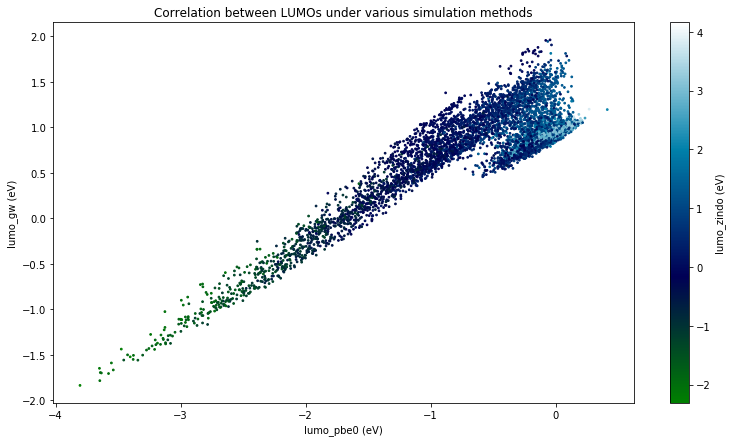

In [17]:
plt.figure(figsize=(13,7))
plt.scatter(LUMOs['lumo_pbe0'], LUMOs['lumo_gw'], s=3, c=LUMOs['lumo_zindo'], cmap='ocean')
plt.colorbar(label='lumo_zindo (eV)')
plt.title('Correlation between LUMOs under various simulation methods')
plt.xlabel('lumo_pbe0 (eV)')
plt.ylabel('lumo_gw (eV)')

Text(0, 0.5, 'lumo_zindo (eV)')

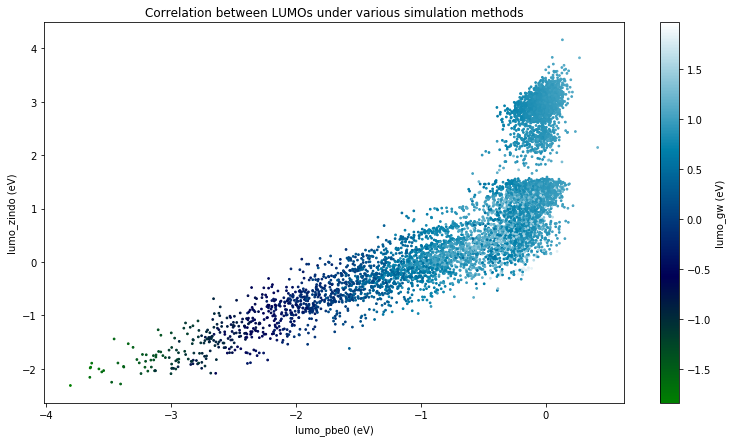

In [18]:
plt.figure(figsize=(13,7))
plt.scatter(LUMOs['lumo_pbe0'], LUMOs['lumo_zindo'], s=3, c=LUMOs['lumo_gw'], cmap='ocean')
plt.colorbar(label='lumo_gw (eV)')
plt.title('Correlation between LUMOs under various simulation methods')
plt.xlabel('lumo_pbe0 (eV)')
plt.ylabel('lumo_zindo (eV)')

Text(0, 0.5, 'lumo_zindo (eV)')

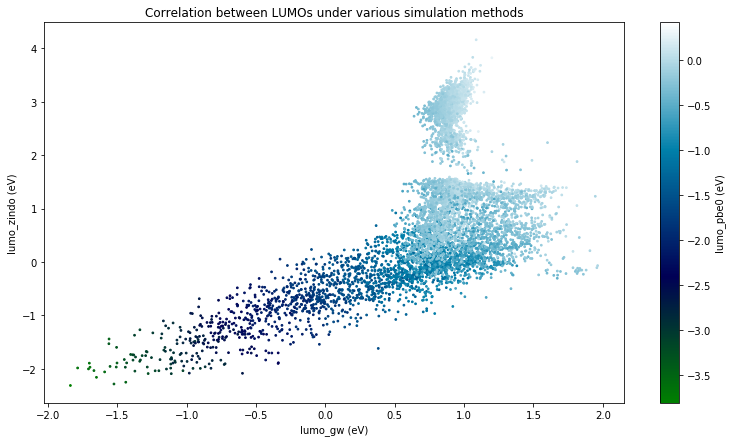

In [19]:
plt.figure(figsize=(13,7))
plt.scatter(LUMOs['lumo_gw'], LUMOs['lumo_zindo'], s=3, c=LUMOs['lumo_pbe0'], cmap='ocean')
plt.colorbar(label='lumo_pbe0 (eV)')
plt.title('Correlation between LUMOs under various simulation methods')
plt.xlabel('lumo_gw (eV)')
plt.ylabel('lumo_zindo (eV)')

Text(0.5, 0.92, 'Correlation between LUMOs under various simulation methods')

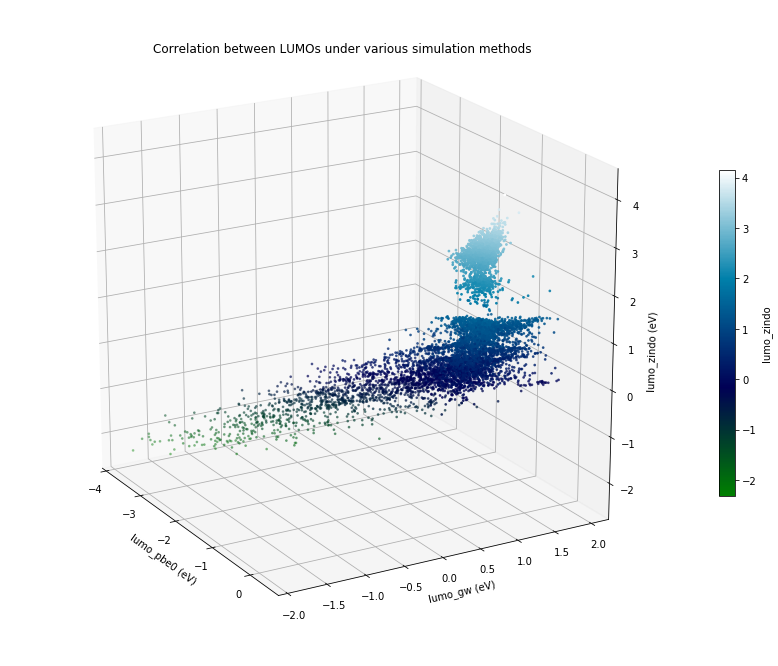

In [20]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
HOMO3d=ax.scatter3D(LUMOs['lumo_pbe0'], LUMOs['lumo_gw'], LUMOs['lumo_zindo'], s=3, c=LUMOs['lumo_zindo'], cmap='ocean')
cbar=plt.colorbar(HOMO3d,shrink=0.5)
cbar.set_label('lumo_zindo')

#Feel free to play around with the values in ax.view_init(), 
#which allows you to change the viewing angle of your final plot
ax.view_init(20,-30)
ax.set_xlabel('lumo_pbe0 (eV)')
ax.set_ylabel('lumo_gw (eV)')
ax.set_zlabel('lumo_zindo (eV)')
ax.set_title('Correlation between LUMOs under various simulation methods')

# Plotting Histograms

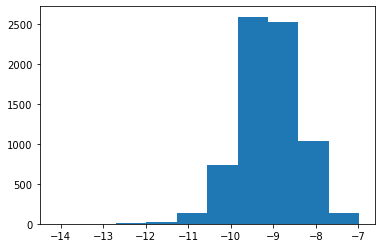

In [21]:
#note: try removing the semicolon at the end of this line to see how the output changes
plt.hist(HOMOs['homo_gw']);

Adding arguments and playing around with various parameters such as bin number:

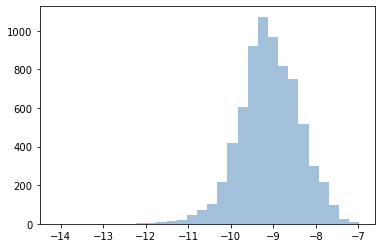

In [50]:
plt.hist(HOMOs['homo_gw'], bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue');

You can also vary the `range` of a histogram like so
(Notice that varying `range` is not the same as varying `xlim`!)

(-14, -7)

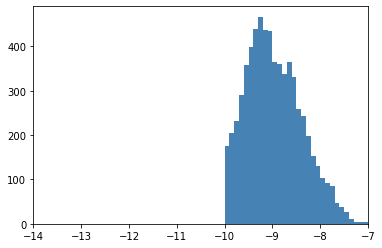

In [59]:
plt.hist(HOMOs['homo_gw'], bins=30, alpha=1,
         histtype='stepfilled', color='steelblue',range=(-10,-7));
plt.xlim(-14,-7)

#### Exercise 1: Play around with the bin and range values above and observe how the plots change. Notice that the number of bins was 30 in both of the above diagrams, yet the second histogram seems to have narrower bars. Why?

The bins on the second histogram were narrower than the first because the second one included a line "plt.xlim(-14,-7)" which fixed the 30 bins to be between -14 and -7, giving them a defined size of 30/7 per bin. Whereas in the first histogram there was so such specification made, so the graph went actually more from aroudn -14.5 to -6.5, about 1/2 a unit over on each end which made the x axis cover more data than in the second histogram, so the bins were wider to still be able to have 30.

#### Exercise 2: Plot a histogram of `homo_zindo`, with bin and range values of your choice.

(-15, -5)

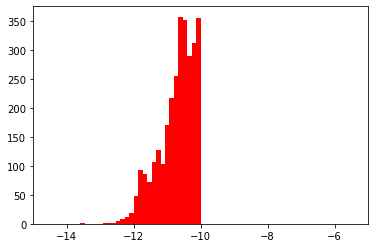

In [24]:
plt.hist(HOMOs['homo_zindo'], bins = 30, alpha=1,
        histtype='stepfilled', color='red', range=(-14,-10));
plt.xlim(-15,-5)

### Determining and Plotting the Mean, Median, and Mode

Note there are multiple ways to find a mean! Here are 2:

In [25]:
np.mean(qm7b['homo_gw'])

-9.091136194702537

In [26]:
qm7b['homo_gw'].mean()

-9.091136194702537

and median:

In [27]:
np.median(qm7b['homo_gw'])

-9.1029

In [28]:
qm7b['homo_gw'].median()

-9.1029

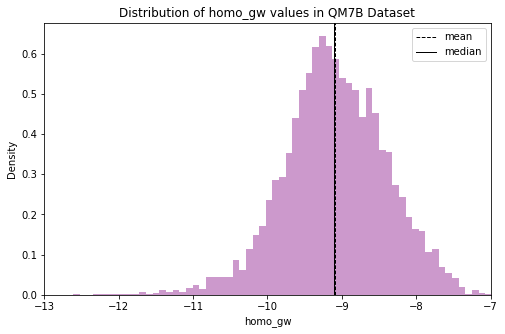

In [29]:
plt.figure(figsize=(8,5))
plt.hist(qm7b['homo_gw'], color='purple', bins=80, alpha = 0.4, density=True);
plt.axvline(qm7b['homo_gw'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(qm7b['homo_gw'].median(), color='k', linestyle='solid', linewidth=1, label = 'median')
plt.xlim(-13,-7)
plt.ylabel('Density')
plt.xlabel('homo_gw')
plt.title('Distribution of homo_gw values in QM7B Dataset')
plt.legend()

### Multiple Histograms

It is also possible to plot multiple hisograms on the same set of axes. Setting transparency `alpha` to less than 1 allows us to more conveniently compare separate histograms or distributions by observing their overlap. They are all normalized to 1 with the `denstiy=True` argument

Text(0.5, 1.0, 'Distributions of homo_gw, homo_pbe0, and homo_zindo values in QM7B')

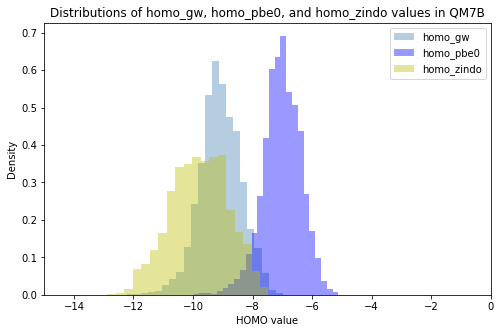

In [30]:
plt.figure(figsize=(8,5))
plt.hist(HOMOs['homo_gw'], color = 'steelblue', bins=30, alpha = 0.4, density=True, label='homo_gw')
plt.hist(HOMOs['homo_pbe0'], color='b', bins=30, alpha = 0.4, density=True, label='homo_pbe0')
plt.hist(HOMOs['homo_zindo'], color='y', bins=30, alpha = 0.4, density=True, label='homo_zindo')
plt.legend()
plt.xlim(-15,0)
plt.ylabel('Density')
plt.xlabel('HOMO value')
plt.title('Distributions of homo_gw, homo_pbe0, and homo_zindo values in QM7B')

Note that here, all probability distributions have been normalized to unity with the `density = True` argument. The sum of the area under each histogram should equal 1. Feel free to explore what `density = False` returns

#### Exercise 3: Plot a histogram of each of the three columns of `LUMOs` on the same axes

Text(0.5, 1.0, 'Distribution of lumo_gw, lumo_pbe0, and lumo_zindo values in QM7B')

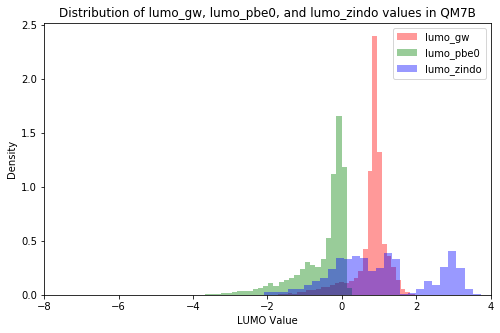

In [60]:
plt.figure(figsize=(8,5))
plt.hist(LUMOs['lumo_gw'], color = 'r', bins = 30, alpha = 0.4, density=True, label='lumo_gw')
plt.hist(LUMOs['lumo_pbe0'], color = 'g', bins = 30, alpha = 0.4, density=True, label='lumo_pbe0')
plt.hist(LUMOs['lumo_zindo'], color = 'b', bins = 30, alpha = 0.4, density=True, label='lumo_zindo')
plt.legend()
plt.xlim(-8,4)
plt.ylabel('Density')
plt.xlabel('LUMO Value')
plt.title('Distribution of lumo_gw, lumo_pbe0, and lumo_zindo values in QM7B')

### 2D Histograms

Just for fun, compare original scatterplot to a 2D histogram of the same information

Text(0, 0.5, 'homo_zindo')

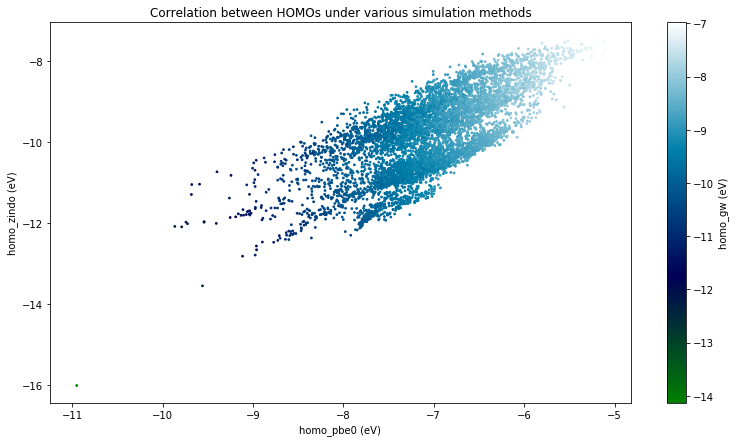

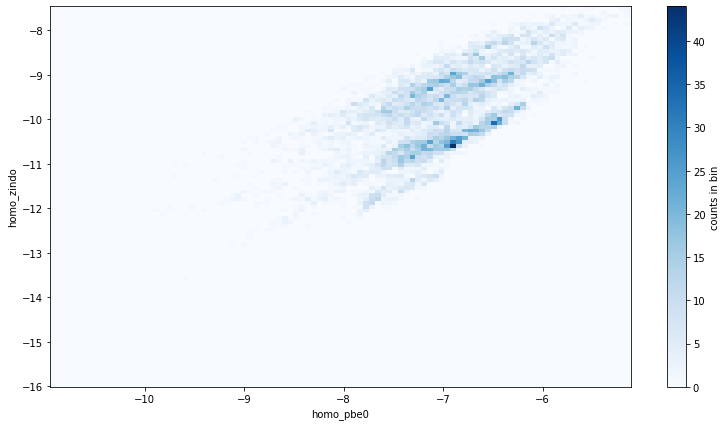

In [32]:
plt.figure(figsize=(13,7))
plt.scatter(HOMOs['homo_pbe0'], HOMOs['homo_zindo'], s=3, c=HOMOs['homo_gw'], cmap='ocean')
plt.colorbar(label='homo_gw (eV)')
plt.title('Correlation between HOMOs under various simulation methods')
plt.xlabel('homo_pbe0 (eV)')
plt.ylabel('homo_zindo (eV)')

plt.figure(figsize=(13,7))
plt.hist2d(HOMOs['homo_pbe0'], HOMOs['homo_zindo'], bins=100, cmap='Blues')
plt.colorbar(label='counts in bin')
plt.xlabel('homo_pbe0')
plt.ylabel('homo_zindo')

#### Exercise 4: vary the bin sizes in the 2D histogram above to observe how the histogram changes. Plot a 2D histogram of some other data drawn from the `qm7b` dataset

Text(0, 0.5, 'imax_zindo')

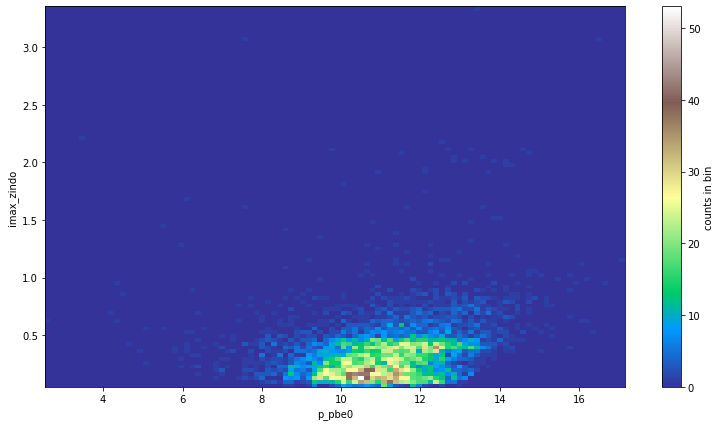

In [61]:
plt.figure(figsize=(13,7))
plt.hist2d(qm7b['p_pbe0'], qm7b['imax_zindo'], bins = 100, cmap ='terrain')
plt.colorbar(label = 'counts in bin')
plt.xlabel('p_pbe0')
plt.ylabel('imax_zindo')

### Ionization Potential, Electron Affinity, and Atomization Energy

*Ionization potential* describes the minimum energy required to remove the most loosely bound electron from a neutral atom or molecule.*Electron affinity* describes the energy released when an electron is attached to a neutral atom or molecule. One would, therefore, expect some level of correlation between the two. Let's look at how they are also related to Atomization Energy, which measures the energy it would take to break down a molecule into all its individual atoms. Let's plot some initial, non-judgmental visuals to get a feel for the data again:

Here we extract columns directly from `qm7b`

Text(0, 0.5, 'Electron Affinity (eV)')

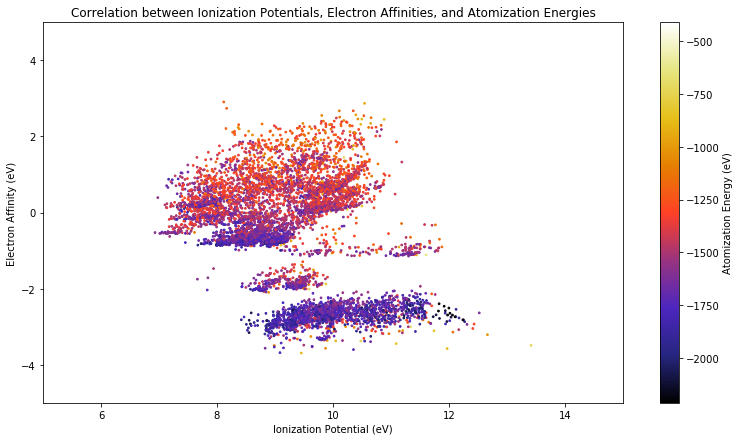

In [34]:
plt.figure(figsize=(13,7))
plt.scatter(qm7b['ip_zindo'], qm7b['ea_zindo'], s=3, c=qm7b['ae_pbe0'], cmap='CMRmap')
plt.colorbar(label='Atomization Energy (eV)')
plt.xlim(5,15)
plt.ylim(-5,5)
plt.title('Correlation between Ionization Potentials, Electron Affinities, and Atomization Energies')
plt.xlabel('Ionization Potential (eV)')
plt.ylabel('Electron Affinity (eV)')

Text(0, 0.5, 'Atomization Energy (eV)')

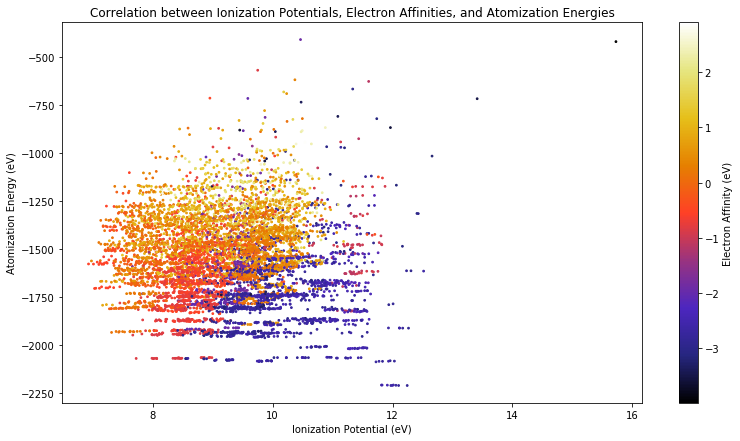

In [35]:
plt.figure(figsize=(13,7))
plt.scatter(qm7b['ip_zindo'], qm7b['ae_pbe0'], s=3, c=qm7b['ea_zindo'], cmap='CMRmap')
plt.colorbar(label='Electron Affinity (eV)')
plt.title('Correlation between Ionization Potentials, Electron Affinities, and Atomization Energies')
plt.xlabel('Ionization Potential (eV)')
plt.ylabel('Atomization Energy (eV)')

Text(0, 0.5, 'Atomization Energy (eV)')

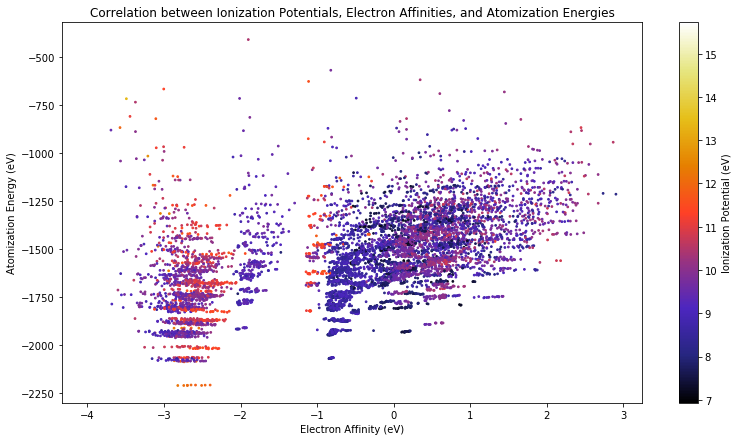

In [36]:
plt.figure(figsize=(13,7))
plt.scatter(qm7b['ea_zindo'], qm7b['ae_pbe0'], s=3, c=qm7b['ip_zindo'], cmap='CMRmap')
plt.colorbar(label='Ionization Potential (eV)')
plt.title('Correlation between Ionization Potentials, Electron Affinities, and Atomization Energies')
plt.xlabel('Electron Affinity (eV)')
plt.ylabel('Atomization Energy (eV)')

Text(0.5, 0.92, 'Correlation between Ionization Potentials, Electron Affinities, and Atomization Energies')

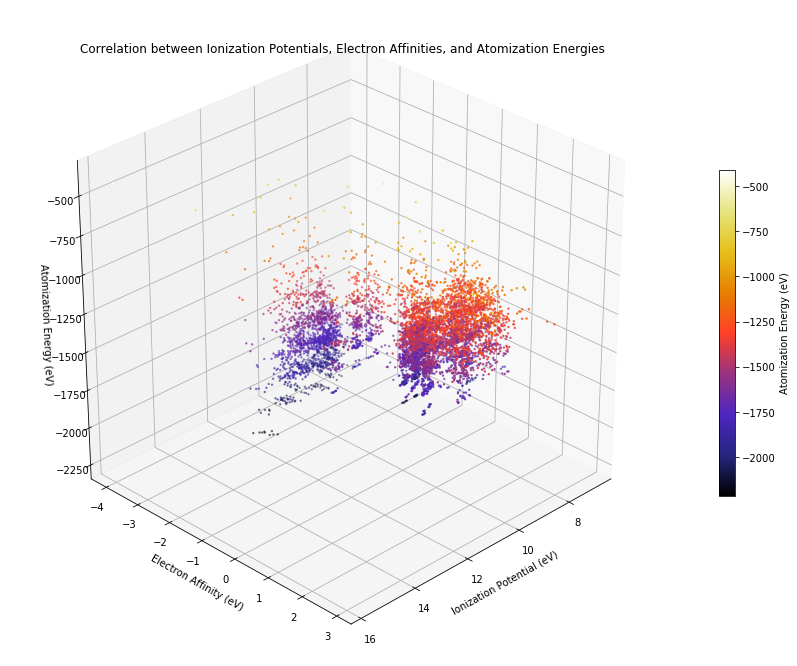

In [37]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')
HOMO3d=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'], qm7b['ae_pbe0'], s=2, c=qm7b['ae_pbe0'], cmap='CMRmap')
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')
cbar=plt.colorbar(HOMO3d,shrink=0.5, label = "Atomization Energy (eV)")
ax.view_init(30,45)
ax.set_xlabel('Ionization Potential (eV)')
ax.set_ylabel('Electron Affinity (eV)')
ax.set_zlabel('Atomization Energy (eV)')
ax.set_title('Correlation between Ionization Potentials, Electron Affinities, and Atomization Energies')

# Skewed Distributions

Text(0.5, 1.0, 'Distribution of lumo_pbe0 values in QM7B Dataset')

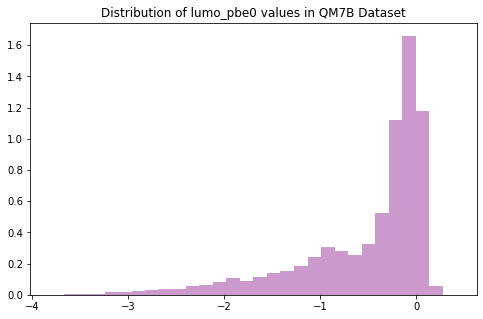

In [38]:
plt.figure(figsize=(8,5))
plt.hist(qm7b['lumo_pbe0'], color='purple', bins=30, alpha = 0.4, density=True);
plt.title("Distribution of lumo_pbe0 values in QM7B Dataset")

#### Exercise 5: Find the mean and median of `lumo_pbe0` and overlay it on this histogram

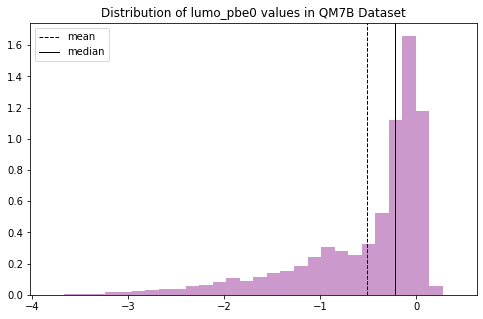

In [62]:
plt.figure(figsize=(8,5))
plt.hist(qm7b['lumo_pbe0'], color='purple', bins=30, alpha = 0.4, density=True);
plt.title("Distribution of lumo_pbe0 values in QM7B Dataset")
plt.axvline(qm7b['lumo_pbe0'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')
plt.axvline(qm7b['lumo_pbe0'].median(), color='k', linestyle='solid', linewidth=1, label = 'median')
plt.legend()

#### Exercise 6: Would we expect the mean and median to be closer or more distant in a highly skewed (or asymmetric) distribution like this one?

In a highly skewed (asymmetrical) data set like this one, we expect the median and mean to get further apart as we become more asymmetrical. This is because the mean is the average of all the values in the set, whereas the median represents the "middle" value in the list of values.

# Sampling, with and without replacement

When we sample *with* replacement, the same value can be chosen more than once. When we sample without replacement, on the other hand, once a value is chosen it can no longer be chosen a second time.

Here we take samples from `lumo_pbe0` without replacement (`replace=False`). The `frac` argument describes the fraction of the orinal sample we will sample (recall `qm7b` has 7211 rows, which we found with `qm7b.shape` earlier, so `frac` x 7211 will be roughly the number of samples generated)

In [40]:
lumo_pbe0_sample = qm7b['lumo_pbe0'].sample(frac=0.1, replace=False) 
lumo_pbe0_sample

4145   -0.4584
4114    0.0812
376    -0.1332
1636   -0.0188
6       0.1690
         ...  
2307   -0.2087
2352   -1.6651
391    -0.0643
1139   -1.8427
4040   -0.5720
Name: lumo_pbe0, Length: 721, dtype: float64

Text(0.5, 1.0, 'Distribution of Sample Without Replacement of lumo_pbe0 values in QM7B Dataset')

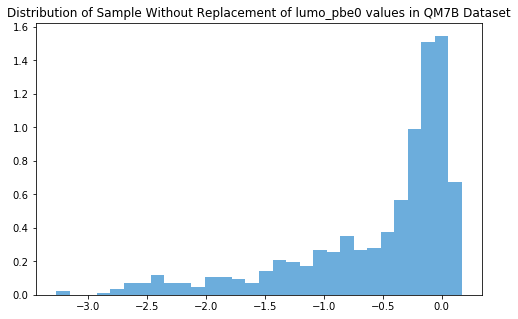

In [41]:
plt.figure(figsize=(8,5))
plt.hist(lumo_pbe0_sample, color='#6CADDC', bins=30, alpha = 1, density=True);
plt.title("Distribution of Sample Without Replacement of lumo_pbe0 values in QM7B Dataset")

Now let's try sampling *with* replacement

In [42]:
lumo_pbe0_sample_with_replacement = qm7b['lumo_pbe0'].sample(frac=0.1, replace=True) 
lumo_pbe0_sample_with_replacement

4296   -0.1956
4794   -0.5076
6041    0.0300
5179   -0.5815
2555    0.0323
         ...  
3549   -0.0227
2624    0.0396
1224    0.0720
3480   -1.0600
7104   -0.4570
Name: lumo_pbe0, Length: 721, dtype: float64

Text(0.5, 0, 'ip_zindo values')

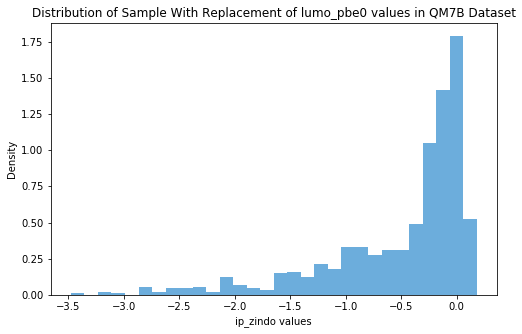

In [43]:
plt.figure(figsize=(8,5))
plt.hist(lumo_pbe0_sample_with_replacement, color='#6CADDC', bins=30, alpha = 1, density=True);
plt.title("Distribution of Sample With Replacement of lumo_pbe0 values in QM7B Dataset")
plt.ylabel("Density")
plt.xlabel("ip_zindo values")

Note than when we sample *with* replacement, each sample value is **independent** of the sample values that came before it because the probabilities of each pick are unaffected by the results of earlier picks. When we sample *without* replacement, on the other hand, each sample value is **dependent** on the values that came before it, because each time we take a sample we reduce the number of possibile values the next samples could adopt. 

### Comparing Means

Observing how close the sample mean is to the population mean is a quick way to get an initial feel for how representative the sample is 

In [44]:
qm7b['lumo_pbe0'].mean()

-0.5152835251698793

In [45]:
lumo_pbe0_sample.mean()

-0.5475273231622746

In [46]:
lumo_pbe0_sample_with_replacement.mean()

-0.4996295423023578

Distances of sample means to population mean:

In [47]:
qm7b['lumo_pbe0'].mean()-lumo_pbe0_sample.mean()

0.032243797992395296

In [48]:
qm7b['lumo_pbe0'].mean()-lumo_pbe0_sample_with_replacement.mean()

-0.01565398286752151

#### Exercise 7: Try varying the  `frac` values above to observe how different sampling sizes affect the final distribution. Is the sample with or without replacement truer to the original, unsampled data?

It seems from my testing that the sample with replacement is closer to the original population data, this is because the difference in their means is smaller than the difference between the mean of the population and the sample without replacement.

#### Exercise 8: Why is it that if `frac` > 1, `replace` should be set to True? What happens if you don't set it to True?

It is impossible to take more than 100% of the data unless you are repeating values, which would mean that Replace = True. I will see what happens when we don't set replace = true in the next code cell. As we can see we get an error saying that replacement must be set to True when "upsampling" the population with a fraction greater than 1. 

In [49]:
lumo_pbe0_sample = qm7b['lumo_pbe0'].sample(frac=1.5, replace=False) 
lumo_pbe0_sample
plt.figure(figsize=(8,5))
plt.hist(lumo_pbe0_sample, color='#6CADDC', bins=30, alpha = 1, density=True);
plt.title("Distribution of Sample Without Replacement, with frac > 1 of lumo_pbe0 values in QM7B Dataset")

ValueError: Replace has to be set to `True` when upsampling the population `frac` > 1.

#### Exercise 9: Take a sample of `lumo_zindo` with replacement, with a `frac` value of your choice; then plot a histogram of this sample

Text(0.5, 1.0, 'Distribution of lumo_zindo sample with replacement in the QM7B dataset')

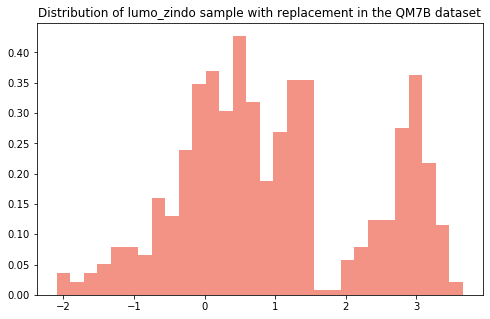

In [64]:
lumo_zindo_sample = qm7b['lumo_zindo'].sample(frac = 0.1, replace = True)
plt.figure(figsize=(8,5))
plt.hist(lumo_zindo_sample, color='#f39385', bins = 30, alpha = 1, density = True)
plt.title("Distribution of lumo_zindo sample with replacement in the QM7B dataset")

# Number of Carbons vs. Atomization Energy

Let's observe how the number of carbons in a given molecule, `n_C`, is correlated with the atomization energy of the molecule, `ae_pbe0`

In [ ]:
n_C_ae = qm7b[['n_C','ae_pbe0']]
n_C_ae

In [ ]:
plt.figure(figsize=(13,7))
plt.scatter(qm7b['n_C'], qm7b['ae_pbe0'], s=3, c=qm7b['ae_pbe0'], cmap='BuPu', alpha =0.7)
plt.colorbar(label='Ionization Potential (eV)')
plt.title('Correlation between Number of Carbons per Molecule and Atomization Energies')
plt.xlabel('Number of Carbons per Molecule')
plt.ylabel('Atomization Energy (eV)')

#### Exercise 10: what does the graph above indicate about the relationship between the number of carbons in a molecule and its atomization energy? Remember that Atomization Energy measures the energy it takes to separate a molecule into all its individual atoms

This graph shows us that as we increase the number of carbon atoms per molecule, in general we are increasing the magnitude of the atomization energy by about the same amount. This makes sense when you think about it, because the AE is the energy it takes to seperate the molecule into all its individual atoms, so each new Carbon - Carbon bond brings to the molecule a certain amount of energy that it needs to break, which is why it is almost a linear relationship. 

#### Exercise 11: Plot a graph of the number of H atoms against the Atomization Energy of the molecules. Does your explanation for the correlation above also apply here?

Text(0, 0.5, 'Atomization Energy (eV)')

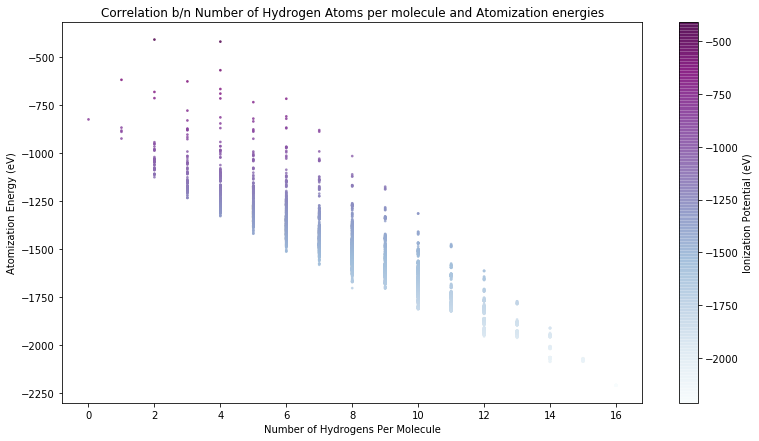

In [65]:
plt.figure(figsize=(13,7))
plt.scatter(qm7b['n_H'], qm7b['ae_pbe0'], s=3, c=qm7b['ae_pbe0'],cmap='BuPu', alpha=0.7)
plt.colorbar(label='Ionization Potential (eV)')
plt.title('Correlation b/n Number of Hydrogen Atoms per molecule and Atomization energies')
plt.xlabel('Number of Hydrogens Per Molecule')
plt.ylabel('Atomization Energy (eV)')

Yes this graph agrees with the explanation I reached in Exercise 10.

# Primer on Latex in markdown for equations

Double click on each of the lines below to see how latex formatting creates attractive mathematical notation in markdown

- Subscripts: $a_b$ and superscripts: $a^b$

- Integrals $\int$ and fractions $\frac{a}{b}$.

- Lower case Greek letters: $\omega$ $\delta$ etc. 

- Upper case Greek letters: $\Omega$ $\Delta$.

- Mathematical operators: $\sin(\beta)$, $\cos(\alpha)$, $\log(x)$ etc.

- Brackets $(\epsilon)$, $\{\sigma\}$, $[\gamma]$, $\|\alpha\|$

- Binomial coefficient $\binom{n}{k}$

e.g. $T^{i_1 i_2 \dots i_p}_{j_1 j_2 \dots j_q} = T(x^{i_1},\dots,x^{i_p},e_{j_1},\dots,e_{j_q})$

- Matrices: $\begin{pmatrix}
1 & 2 & 3\\
a & b & c
\end{pmatrix}$

- Arithmetic: $+$, $-$

- Square root: $\sqrt[n]{a+b}$

- Summations = $\sum_{n=1}^{\infty} 2^{-n} = 1$

#### Exercise 12: Find the equation for a normal distribution, then write and print it using latex markdown 

$f(x) = $$\frac{1}{\sigma\sqrt{2\pi}}$ $e^\frac{-(x-\mu)^2}{2\sigma^2}$

# Standard Deviation

The standard deviation of a population is found as follows:

$\sigma$ = $\sqrt[]{\frac{\sum(x_i-\mu)^2}{N}}$

Where:
- $\sigma$ = standard deviation for a population
- $N$ = population size
- $x_i$ = each individual value from the population
- $\mu$ = the population mean

In [69]:
#This command creates a 1x10 array of random values
randArray1 = np.random.rand(1,10)
randArray1

array([[0.26944366, 0.57174115, 0.8161348 , 0.38459616, 0.33715488,
        0.71641455, 0.66454998, 0.84017481, 0.63652177, 0.2416316 ]])

In [70]:
np.std(randArray1)

0.2121841050699453

In [71]:
#notice here we're taking a slice of the first 9 values of the array. 
#Notice that the standard deviation changes.
np.std(randArray1[:,:9])

0.19608435719704154

### Applying `std` to `qm7b` data

In [72]:
np.std(HOMOs['homo_gw'])

0.6958487451104021

Text(0.5, 1.0, 'Distribution of lumo_zindo values in QM7B data set')

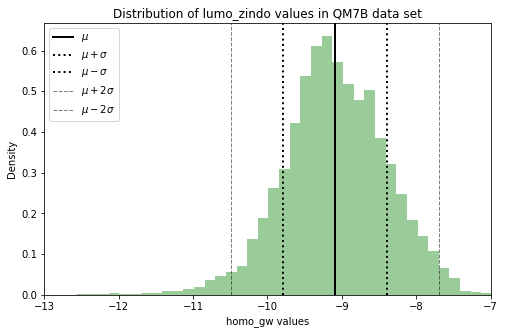

In [73]:
fig = plt.figure(figsize=(8,5))
plt.hist(HOMOs['homo_gw'], color='g', bins=50, alpha = 0.4, density=True);
plt.axvline(HOMOs['homo_gw'].mean(), color='k', linestyle='solid', linewidth=2, label = '$\mu$')
plt.axvline(HOMOs['homo_gw'].mean()+np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu+\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()-np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu-\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()+2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu+2\sigma$',alpha=0.5)
plt.axvline(HOMOs['homo_gw'].mean()-2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu-2\sigma$',alpha=0.5)
plt.legend()
plt.xlim(-13,-7)
plt.ylabel('Density')
plt.xlabel('homo_gw values')
plt.title("Distribution of lumo_zindo values in QM7B data set")


Text(0.5, 1.0, 'Distribution of lumo_zindo values in QM7B data set')

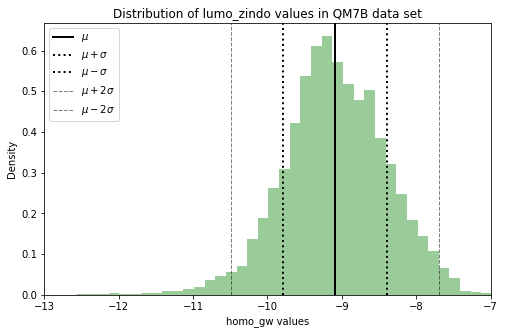

In [74]:
plt.figure(figsize=(8,5))
#You could, alternatively, plot the histogram like so. Grid lines are drawn automatically. 
#use the argument grid=False to remove gridlines
HOMOs['homo_gw'].hist(color='g', bins=50, alpha = 0.4, density=True, grid = False);
plt.axvline(HOMOs['homo_gw'].mean(), color='k', linestyle='solid', linewidth=2, label = '$\mu$')
plt.axvline(HOMOs['homo_gw'].mean()+np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu+\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()-np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu-\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()+2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu+2\sigma$',alpha=0.5)
plt.axvline(HOMOs['homo_gw'].mean()-2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu-2\sigma$',alpha=0.5)
plt.legend()
plt.xlim(-13,-7)
plt.ylabel('Density')
plt.xlabel('homo_gw values')
plt.title("Distribution of lumo_zindo values in QM7B data set")

The normalized histogram above is also known as a **probability density function (PDF)**. The probably of a sample lying in one of the columns is the height of the column multiplied by the width of the column.

### Cumulative Density Functions (CDFs)

This plot shows the probability of a chosen value being less than or equal to a cutoff value indicated on the x-axis

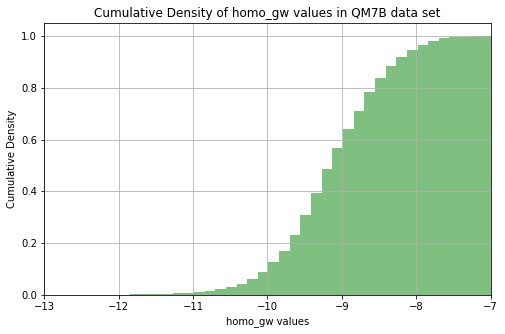

In [75]:
plt.figure(figsize=(8,5))
qm7b['homo_gw'].hist(density = True, cumulative=True, bins = 50, color ='g', alpha=0.5)
plt.xlim(-13,-7)
plt.ylabel('Cumulative Density')
plt.xlabel('homo_gw values')
plt.title("Cumulative Density of homo_gw values in QM7B data set");

#### Exercise 13: Plot a CDF of `ip_zindo`, with no grid lines

Text(0.5, 1.0, 'Cumulative density of ip_zindo values from QM7B dataset')

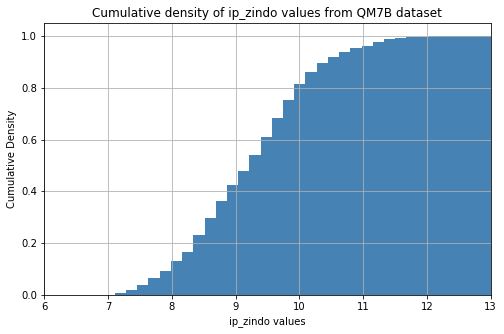

In [76]:
plt.figure(figsize=(8,5))
qm7b['ip_zindo'].hist(density = True, cumulative=True, bins = 50, color = 'steelblue', alpha =1)
plt.xlim(6,13)
plt.ylabel('Cumulative Density')
plt.xlabel('ip_zindo values')
plt.title('Cumulative density of ip_zindo values from QM7B dataset')

# Normal or Gaussian Distributions

Normal probability distributions, colloquially known as 'bell curves', are ubiquitous in the natural sciences. They are described as follows:

### $p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$

Where:
- $\mu$ = sample mean
- $\sigma$ = sample standard deviation

### Normal Distribution Fittings

We can also perform normal distribution fittings to our data:

In [ ]:
norm.fit(qm7b['homo_gw'])

These two figures returned by `norm.fit` indicate: 1.the center of the data and 2.its standard deviation

In [ ]:
plt.figure(figsize=(8,5))
ax = plt.axes()
x = np.linspace(-13,-7);
#loc specifies the center of the distribution, while scale specifies the standard deviation
y = norm(loc = -9.091136194702537, scale = 0.6958487451104021).pdf(x);
ax.plot(x, y, color='red');
ax.hist(qm7b['homo_gw'], density = True, bins=50, color='#4A88B6', alpha=0.8);
plt.axvline(HOMOs['homo_gw'].mean(), color='k', linestyle='solid', linewidth=2, label = '$\mu$')
plt.axvline(HOMOs['homo_gw'].mean()+np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu+\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()-np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu-\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()+2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu+2\sigma$',alpha=0.5)
plt.axvline(HOMOs['homo_gw'].mean()-2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu-2\sigma$',alpha=0.5)
plt.legend()
plt.xlim(-13,-6)
plt.ylabel('Density')
plt.xlabel('homo_gw values')
plt.title("Normal distribution fitting of homo_gw distribution in QM7B data set")


It's important to note that roughly:
- 68.2% of data falls within 1 standard deviation from the mean (from $\mu-\sigma$ to $\mu+\sigma$)
- 95.4% of data falls within 2 s.d's from the mean (from $\mu-2\sigma$ to $\mu+2\sigma$)
- 99.7% of data falls within 3 s.d's from the mean (from $\mu-3\sigma$ to $\mu+3\sigma$)

#### Exercise 14: Plot lines for $\mu-3\sigma$ and $\mu+3\sigma$ in the plot above

Text(0.5, 1.0, 'Normal fitting distribution of homo_gw value including 3 std away from mean')

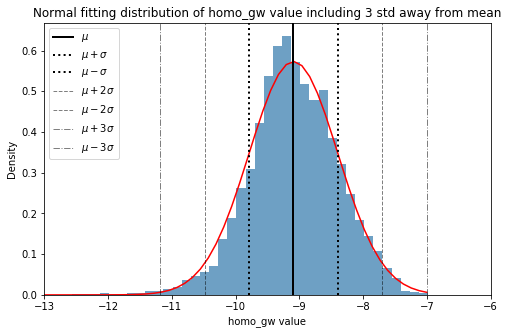

In [68]:
plt.figure(figsize=(8,5))
ax = plt.axes()
x = np.linspace(-13,-7)
y = norm(loc = -9.091136194702537, scale = 0.6958487451104021).pdf(x);
ax.plot(x, y, color='red');
ax.hist(qm7b['homo_gw'], density = True, bins=50, color='#4A88B6', alpha=0.8);
plt.axvline(HOMOs['homo_gw'].mean(), color='k', linestyle='solid', linewidth=2, label = '$\mu$')
plt.axvline(HOMOs['homo_gw'].mean()+np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu+\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()-np.std(HOMOs['homo_gw']), color='k', linestyle='dotted', linewidth=2, label = '$\mu-\sigma$')
plt.axvline(HOMOs['homo_gw'].mean()+2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu+2\sigma$',alpha=0.5)
plt.axvline(HOMOs['homo_gw'].mean()-2*np.std(HOMOs['homo_gw']), color='k', linestyle='dashed', linewidth=1, label = '$\mu-2\sigma$',alpha=0.5)
plt.axvline(HOMOs['homo_gw'].mean()+3*np.std(HOMOs['homo_gw']), color='k', linestyle = 'dashdot', linewidth=1, label = '$\mu+3\sigma$', alpha = 0.5)
plt.axvline(HOMOs['homo_gw'].mean()-3*np.std(HOMOs['homo_gw']), color='k', linestyle = 'dashdot', linewidth=1, label = '$\mu-3\sigma$', alpha = 0.5)
plt.legend()
plt.xlim(-13,-6)
plt.xlabel('homo_gw value')
plt.ylabel('Density')
plt.title('Normal fitting distribution of homo_gw value including 3 std away from mean')

## (Completely Optional) T-tests

A T-test is essentially a test that allows us to compare means between two samples. It allows us to determine whether there is a statistically significant association between two sets of data, or whether the association is by random chance. It allows us to determine our level of confidence as to whether a result is repeatable. 

## $T$ = $\frac{\bar{x}-\mu}{s/\sqrt{n}}$

Where:

- $T$ = t-test
- $\bar{x}$ = mean of current sample
- $\mu$ = mean of reference sample
- $s$ = standard deviation of current sample (not $\sigma$, standard deviation of population)
- $n$ = variable size

The larger the T score, the larger the difference between 2 groups. When we are particularly interested in the directionality of the difference between a first and second sample, we would perform a one-tailed test. If we are equally interested in both positive and negative differences, as we are in this case, we would take a 2-tailed P-value. The P-value is found by taking the area under the graphs highlighted below, and can be estimated from a T value.

In [77]:
Image(url ='https://services.ncl.ac.uk/media/sites/servicesites/itserviceold/communicationcollaborationandresearch/dataanalysis/One,%20Two%20tailed%20test.PNG') 

One has to determine a cut-off ***Critical value***, Typically 0.01 or 0.05. The smaller the stricter. Choosing a critical value of 0.05 means that if we obtain a P-value below 0.05, we have ***95% confidence*** that our result is statistically significant. For a critical value of 0.01, if we obtain a P-value below 0.01, we can have ***99% confidence*** that our result is statistically significant.

### *An Example: A Two-Tailed, Independent, One Sample T-test*

First let's set up a null hypothesis, $H_0$: A 1% Sample of `homo_gw` values in the QM7B dataset is statistically representative of the entire dataset.

Setting our critical value at 0.05:
- if $P<0.05$: we reject the null hypothesis
- if $P>0.05$: we cannot reject the null hypothesis

First, let's take a sample from `homo_gw` (note `frac = 0.01`):

In [78]:
homo_gw_sample1 = qm7b['homo_gw'].sample(frac=0.01, replace=False) 
homo_gw_sample1

3819   -9.7984
7123   -7.2353
3387   -9.3672
3077   -9.1788
2468   -9.0407
         ...  
5988   -9.5003
6034   -9.1338
5911   -8.5307
111    -9.2990
2041   -8.5373
Name: homo_gw, Length: 72, dtype: float64

In [79]:
qm7b['homo_gw'].mean()

-9.091136194702537

In [80]:
homo_gw_sample1.mean()

-9.18677361111111

Plotting the Distributions just to get a feel for how they look:

Text(0.5, 1.0, '1% Sample of QM7B homo_gw Distribution')

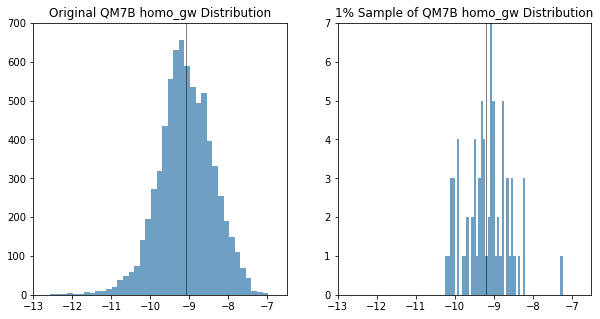

In [81]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5));
axes[0].hist(qm7b['homo_gw'], density = False, bins=50, color='#4A88B6', alpha=0.8);
axes[0].set_xlim(-13,-6.5)
axes[0].set_ylim(0,700)
axes[0].set_title('Original QM7B homo_gw Distribution')
axes[0].plot([HOMOs['homo_gw'].mean(),HOMOs['homo_gw'].mean()],[0,800], color='k', linestyle='solid', linewidth=1, 
             alpha=0.5)
axes[1].hist(homo_gw_sample1, density = False, bins=50, color='#4A88B6', alpha=0.8);
axes[1].plot([homo_gw_sample1.mean(),homo_gw_sample1.mean()],[0,7], color='k', linestyle='solid', linewidth=1, 
             alpha=0.5)
axes[1].set_xlim(-13,-6.5)
axes[1].set_ylim(0,7)
axes[1].set_title('1% Sample of QM7B homo_gw Distribution')

We can find both T and P values from comparing two samples as follows. We use `scipy.stats.ttest_1samp` here because this is an independent, 1-sample T-test. According to the documentation, this function "is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean." Feel free to read more in the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

In [82]:
scipy.stats.ttest_1samp(homo_gw_sample1,qm7b['homo_gw'].mean())

Ttest_1sampResult(statistic=-1.4416399250438603, pvalue=0.1538003620492376)

Note that the P-value shown above is a 2-tailed P-value.

**Since the P-value here is >0.05, we *cannot* reject the null hypothetis, which means that we can be 95% confident that a 1% Sample of `homo_gw` values in the QM7B dataset is statistically representative of the entire dataset.** 

### *One last example: A Related Two-Sample T-test, or a Paired Difference Test*

For a related two-sample T-test, the T statistic is calculated slightly differently:

## $T= \frac{\bar{X_D}-\mu_0}{s_D/\sqrt{n}}$

Where:

- $\bar{X_D}$ is the average of the difference between all pairs
- $s_D$ is the standard deviation of the difference between all pairs
- $n$ is the number of pairs
- $\mu_0$ is set to 0 if we want to test how significantly different the average of the paired differences is

Let's try another Null Hypothesis $H_0$: That there is no statistically significant difference between HOMO values calculated by GW and ZINDO methods in the QM7B Dataset (Remember that QM7B itself is a sampling of a much larger universe of molecules). Let's set a stricter critical value of 0.01:

- if $P<0.01$: we reject the null hypothesis
- if $P>0.01$: we cannot reject the null hypothesis

In [83]:
qm7b['homo_zindo'].mean()

-9.796737068367772

In [84]:
qm7b['homo_gw'].mean()

-9.091136194702537

Here we use the function `scipy.stats.ttest_rel` to calculate T and P values of two *related* samples. `homo_gw` and `homo_zindo` are related since they were conducted on the same samples, just using different methods. This is also why the two samples are *paired* - each `homo_gw` value has a unique associated `homo_zindo` value. According to the documentation, "This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values." Read more in the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html?highlight=ttest#scipy.stats.ttest_rel).

In [85]:
scipy.stats.ttest_rel(qm7b['homo_gw'],qm7b['homo_zindo'])

Ttest_relResult(statistic=90.8682891450797, pvalue=0.0)

Since the P-Value here is 0<0.01, we ***reject*** the Null Hypothesis. That is to say, we can be 99% confident that there ***is*** a statistically significant difference between HOMO values calculated by GW and ZINDO methods in the QM7B Dataset.

References:
- http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
- https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes#Adding_math_to_LaTeX
- https://www.overleaf.com/learn/latex/Brackets_and_Parentheses
- https://www.overleaf.com/learn/latex/Fractions_and_Binomials
- https://web.ma.utexas.edu/users/parker/sampling/repl.htm
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
